<a href="https://colab.research.google.com/github/sshreeshantha22cs131nc-cloud/samsung_shreeshanth/blob/main/ProjectShreeshantha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demand forecasting based on price, income level, and seasonality indicators

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Data Importing and Data Information

In [149]:
df=pd.read_csv('/content/demand_forecast.csv')

In [150]:
df.shape

(1000, 12)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              959 non-null    float64
 1   income_segment         946 non-null    object 
 2   seasonality_index      957 non-null    float64
 3   product_category       947 non-null    object 
 4   promotion_type         718 non-null    object 
 5   competitor_price_usd   943 non-null    float64
 6   economic_indicator     959 non-null    object 
 7   advertising_spend_usd  948 non-null    float64
 8   distribution_channels  948 non-null    float64
 9   product_lifecycle      935 non-null    object 
 10  weather_impact         697 non-null    object 
 11  demand_units           950 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [152]:
df.head()

,price_usd,income_segment,seasonality_index,product_category,promotion_type,competitor_price_usd,economic_indicator,advertising_spend_usd,distribution_channels,product_lifecycle,weather_impact,demand_units
0,137.434274,Low,1.295032,Furniture,Bundle,148.826264,Recession,26821.978511,3.0,Growth,Low,9386.0
1,181.479966,Low,1.345461,Furniture,NaN,122.130560,Recession,47118.697210,1.0,Decline,High,3027.0
2,12.966254,Upper Middle,0.675078,Electronics,Bundle,123.950322,Recession,28501.064264,1.0,Maturity,Medium,3803.0
3,69.155375,Middle,0.888575,Food,Discount,74.372882,Recession,42178.717177,4.0,Maturity,NaN,2348.0
4,35.819000,Middle,0.982581,Food,BOGO,47.240531,Stagnation,42965.406408,4.0,Introduction,Low,NaN


#Data Preprocessing||Cleaning

In [153]:
df['income_segment'].isna().sum()

np.int64(54)

In [154]:
df['product_category'].isna().sum()

np.int64(53)

In [155]:
df['promotion_type'].isna().sum()

np.int64(282)

In [156]:
df['weather_impact'].isna().sum()

np.int64(303)

In [157]:
df['economic_indicator'].isna().sum()

np.int64(41)

In [158]:
df['demand_units'].isna().sum()

np.int64(50)

#filling NA values

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              959 non-null    float64
 1   income_segment         946 non-null    object 
 2   seasonality_index      957 non-null    float64
 3   product_category       947 non-null    object 
 4   promotion_type         718 non-null    object 
 5   competitor_price_usd   943 non-null    float64
 6   economic_indicator     959 non-null    object 
 7   advertising_spend_usd  948 non-null    float64
 8   distribution_channels  948 non-null    float64
 9   product_lifecycle      935 non-null    object 
 10  weather_impact         697 non-null    object 
 11  demand_units           950 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [160]:
df.columns

Index(['price_usd', 'income_segment', 'seasonality_index', 'product_category',
       'promotion_type', 'competitor_price_usd', 'economic_indicator',
       'advertising_spend_usd', 'distribution_channels', 'product_lifecycle',
       'weather_impact', 'demand_units'],
      dtype='object')

In [161]:
df['price_usd']=df['price_usd'].fillna(df['price_usd'].mean())

In [162]:
df['income_segment']=df['income_segment'].fillna(df['income_segment'].mode()[0])

In [163]:
df['product_category']=df['product_category'].fillna(df['product_category'].mode()[0])

In [164]:
df['promotion_type']=df['promotion_type'].fillna(df['promotion_type'].mode()[0])

In [165]:
df['weather_impact']=df['weather_impact'].fillna(df['weather_impact'].mode()[0])

In [166]:
df['economic_indicator']=df['economic_indicator'].fillna(df['economic_indicator'].mode()[0])

In [167]:
df['demand_units']=df['demand_units'].fillna(df['demand_units'].mode()[0])

In [168]:
df['distribution_channels']=df['distribution_channels'].fillna(df['distribution_channels'].mode()[0])

In [169]:
df['competitor_price_usd']=df['competitor_price_usd'].fillna(df['competitor_price_usd'].mean())

In [170]:
df['seasonality_index']=df['seasonality_index'].fillna(df['seasonality_index'].mode()[0])

In [171]:
df['advertising_spend_usd']=df['advertising_spend_usd'].fillna(df['advertising_spend_usd'].mode()[0])

In [172]:
df['product_lifecycle']=df['product_lifecycle'].fillna(df['product_lifecycle'].mode()[0])

In [173]:
df.isna().sum()

,0
price_usd,0
income_segment,0
seasonality_index,0
product_category,0
promotion_type,0
competitor_price_usd,0
economic_indicator,0
advertising_spend_usd,0
distribution_channels,0
product_lifecycle,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              1000 non-null   float64
 1   income_segment         1000 non-null   object 
 2   seasonality_index      1000 non-null   float64
 3   product_category       1000 non-null   object 
 4   promotion_type         1000 non-null   object 
 5   competitor_price_usd   1000 non-null   float64
 6   economic_indicator     1000 non-null   object 
 7   advertising_spend_usd  1000 non-null   float64
 8   distribution_channels  1000 non-null   float64
 9   product_lifecycle      1000 non-null   object 
 10  weather_impact         1000 non-null   object 
 11  demand_units           1000 non-null   float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


#Graphs


<Axes: xlabel='price_usd', ylabel='income_segment'>

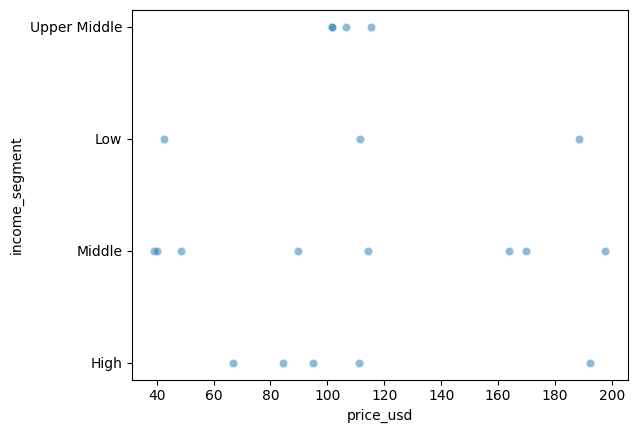

In [175]:
df_sample = df.sample(20, random_state=42)

sns.scatterplot(
    x='price_usd',
    y='income_segment',
    data=df_sample,
    alpha=0.5
)


<Axes: xlabel='product_category', ylabel='demand_units'>

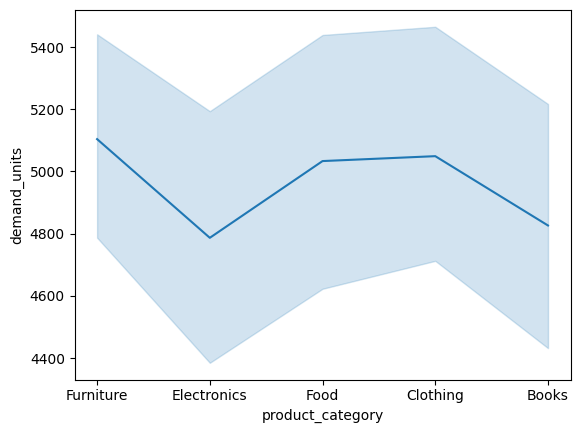

In [176]:
sns.lineplot(
    x='product_category',
    y='demand_units',
    data=df
)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              1000 non-null   float64
 1   income_segment         1000 non-null   object 
 2   seasonality_index      1000 non-null   float64
 3   product_category       1000 non-null   object 
 4   promotion_type         1000 non-null   object 
 5   competitor_price_usd   1000 non-null   float64
 6   economic_indicator     1000 non-null   object 
 7   advertising_spend_usd  1000 non-null   float64
 8   distribution_channels  1000 non-null   float64
 9   product_lifecycle      1000 non-null   object 
 10  weather_impact         1000 non-null   object 
 11  demand_units           1000 non-null   float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [178]:
#demand distribution

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing demand units !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


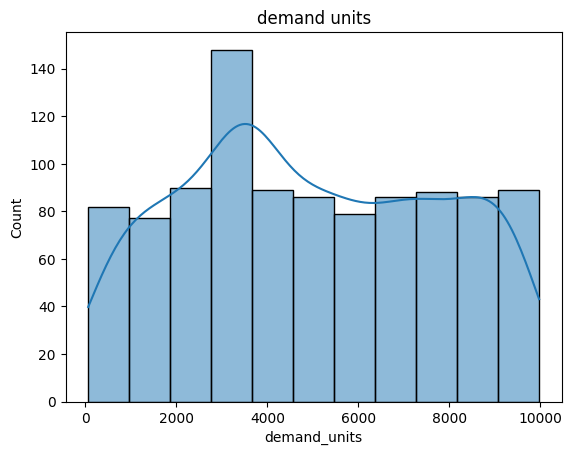

In [179]:
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing demand units !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
sns.histplot(df['demand_units'],kde=True)
plt.title("demand units")
plt.show()

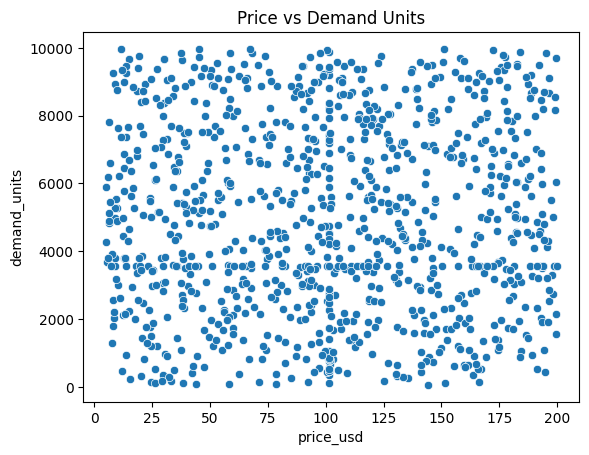

In [180]:
#price vs demand
sns.scatterplot(x='price_usd', y='demand_units', data=df)
plt.title("Price vs Demand Units")
plt.show()


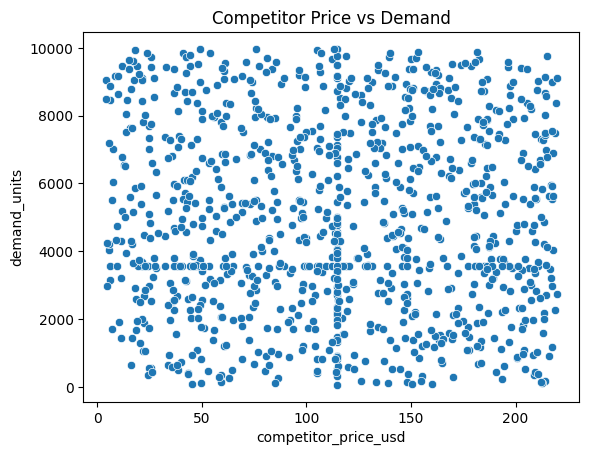

In [181]:
#competitor price vs demand
sns.scatterplot(x='competitor_price_usd', y='demand_units', data=df)
plt.title("Competitor Price vs Demand")
plt.show()


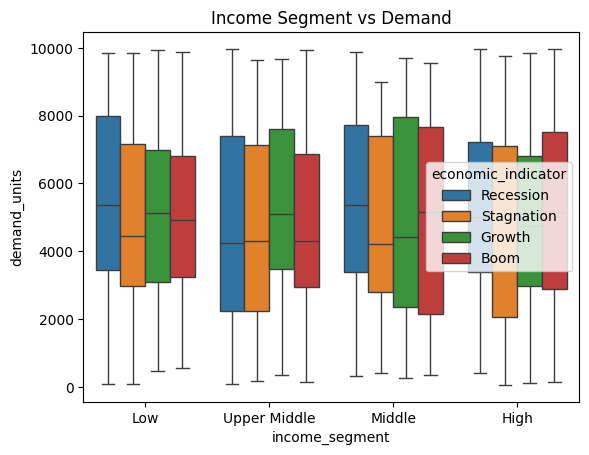

In [182]:
#income_segment vs demand
sns.boxplot(x='income_segment', y='demand_units',hue='economic_indicator', data=df)
plt.title("Income Segment vs Demand")
plt.show()



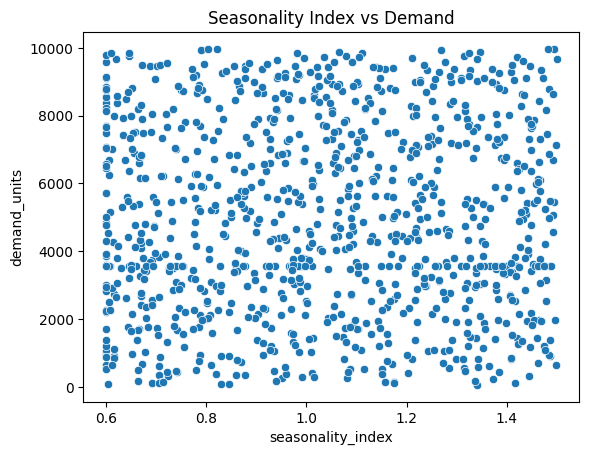

In [183]:
#seasonality_impact
sns.scatterplot(x='seasonality_index', y='demand_units', data=df)
plt.title("Seasonality Index vs Demand")
plt.show()


####################### Line Graph Of product category and product_lifecycle  #######################


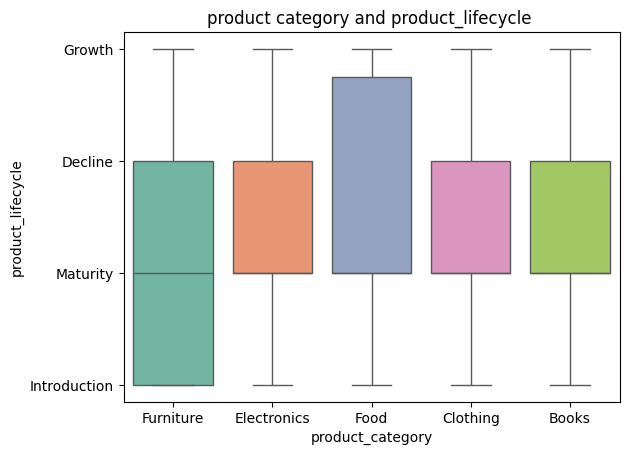

In [184]:
print("####################### Line Graph Of product category and product_lifecycle  #######################")
sns.boxplot(x='product_category', y='product_lifecycle',hue='product_category',data=df,palette='Set2',legend=False)
plt.title("product category and product_lifecycle ")
plt.show()

In [185]:
df['distribution_channels'].value_counts()

,count
distribution_channels,
4.0,308
1.0,237
2.0,233
3.0,222


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of competitor_price_usd @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


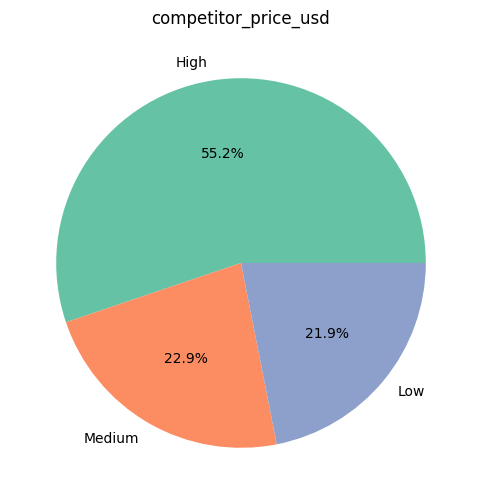

In [186]:
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of competitor_price_usd @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
counts = df['weather_impact'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title('competitor_price_usd')
plt.show()

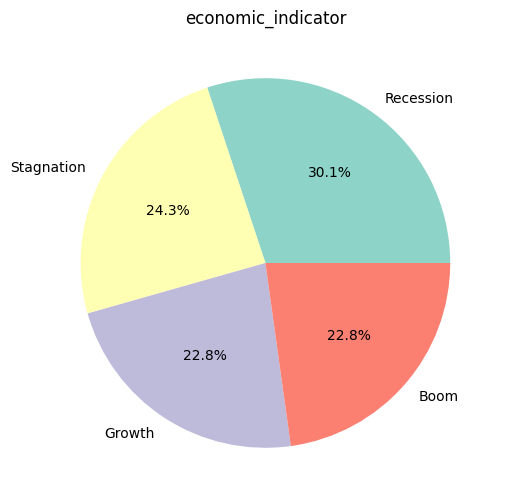

In [187]:
counts = df['economic_indicator'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('economic_indicator')
plt.show()

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              1000 non-null   float64
 1   income_segment         1000 non-null   object 
 2   seasonality_index      1000 non-null   float64
 3   product_category       1000 non-null   object 
 4   promotion_type         1000 non-null   object 
 5   competitor_price_usd   1000 non-null   float64
 6   economic_indicator     1000 non-null   object 
 7   advertising_spend_usd  1000 non-null   float64
 8   distribution_channels  1000 non-null   float64
 9   product_lifecycle      1000 non-null   object 
 10  weather_impact         1000 non-null   object 
 11  demand_units           1000 non-null   float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


#REGRESSION

#OLS

<Axes: xlabel='price_usd', ylabel='demand_units'>

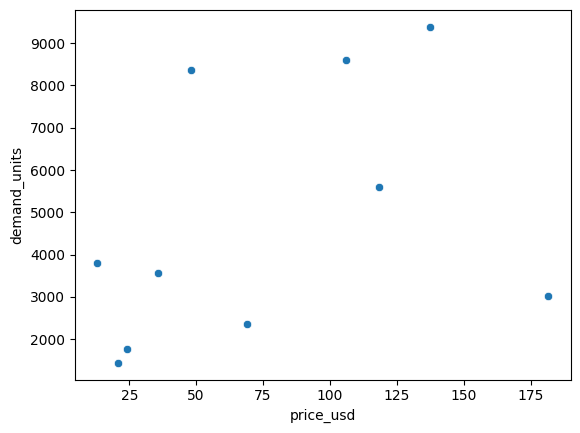

In [189]:
from numpy import ScalarType
part_df=df[:10]
sns.scatterplot(x='price_usd',y=df['demand_units'],data=part_df)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              1000 non-null   float64
 1   income_segment         1000 non-null   object 
 2   seasonality_index      1000 non-null   float64
 3   product_category       1000 non-null   object 
 4   promotion_type         1000 non-null   object 
 5   competitor_price_usd   1000 non-null   float64
 6   economic_indicator     1000 non-null   object 
 7   advertising_spend_usd  1000 non-null   float64
 8   distribution_channels  1000 non-null   float64
 9   product_lifecycle      1000 non-null   object 
 10  weather_impact         1000 non-null   object 
 11  demand_units           1000 non-null   float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [191]:
import statsmodels.api as sm

In [192]:
X = X.astype(float) # Convert all columns to float, handling bools as 0.0 or 1.0
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      seasonality_index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.504e+27
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        19:11:01   Log-Likelihood:                 29274.
No. Observations:                1000   AIC:                        -5.850e+04
Df Residuals:                     977   BIC:                        -5.839e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [193]:
print("Accuracy:",round(model.rsquared*100,4),"%")

Accuracy: 100.0 %


In [194]:
df3=pd.get_dummies(df)

In [195]:
df3=pd.get_dummies(df)


In [196]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   float64
 6   income_segment_High             1000 non-null   bool   
 7   income_segment_Low              1000 non-null   bool   
 8   income_segment_Middle           1000 non-null   bool   
 9   income_segment_Upper Middle     1000 non-null   bool   
 10  product_category_Books          1000 non-null   bool   
 11  product_category_Clothing       1000 non-null   bool   
 12  product_category_Electronics    100

In [197]:
for feature in df3.columns:
  df3[feature]=df3[feature].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   float64
 6   income_segment_High             1000 non-null   float64
 7   income_segment_Low              1000 non-null   float64
 8   income_segment_Middle           1000 non-null   float64
 9   income_segment_Upper Middle     1000 non-null   float64
 10  product_category_Books          1000 non-null   float64
 11  product_category_Clothing       1000 non-null   float64
 12  product_category_Electronics    100

In [198]:
X=df3.drop('seasonality_index',axis=1)
Y=df3['seasonality_index']

In [199]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      seasonality_index   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7666
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.769
Time:                        19:11:03   Log-Likelihood:                -109.76
No. Observations:                1000   AIC:                             265.5
Df Residuals:                     977   BIC:                             378.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [200]:
print("Accuracy:",round(model.rsquared*100,4),"%")

Accuracy: 1.697 %


# CLASSIFICATION USING NEURAL NETWORK

#Multilayer Classification

In [201]:
df4=df3.copy()

In [202]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   float64
 6   income_segment_High             1000 non-null   float64
 7   income_segment_Low              1000 non-null   float64
 8   income_segment_Middle           1000 non-null   float64
 9   income_segment_Upper Middle     1000 non-null   float64
 10  product_category_Books          1000 non-null   float64
 11  product_category_Clothing       1000 non-null   float64
 12  product_category_Electronics    100

In [203]:
import pandas as pd

bins = [300, 549, 649, 699, 749, 900]
labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']

df4['demand_units'] = pd.cut(
    df4['demand_units'],
    bins=bins,
    labels=labels,
    right=True
)

In [204]:
df4['demand_units'].value_counts().sort_index()

,count
demand_units,
Very Poor,25
Poor,8
Fair,5
Good,2
Excellent,14


In [205]:
df4['demand_units']=df4['demand_units'].fillna('Very Poor')

In [206]:
print(df4['demand_units'].unique())
print("Number of unique values:", df4['demand_units'].nunique())

['Very Poor', 'Excellent', 'Poor', 'Fair', 'Good']
Categories (5, object): ['Very Poor' < 'Poor' < 'Fair' < 'Good' < 'Excellent']
Number of unique values: 5


In [207]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['demand_units'] = le.fit_transform(df4['demand_units'])

In [208]:
df4['demand_units'].value_counts()

,count
demand_units,
4,971
0,14
3,8
1,5
2,2


In [209]:
from sklearn.model_selection import train_test_split

X = df4.drop(['distribution_channels','demand_units'], axis=1)
y = df4['distribution_channels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [211]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 27) (800,)
(200, 27) (200,)


In [212]:
import numpy as np
print(np.unique(y_train))


[1. 2. 3. 4.]


In [213]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1924 - loss: 2838.4558 - val_accuracy: 0.2062 - val_loss: 1456.8324
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2359 - loss: 1108.4928 - val_accuracy: 0.2500 - val_loss: 298.6731
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2445 - loss: 189.3756 - val_accuracy: 0.3187 - val_loss: 41.8216
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2674 - loss: 32.3018 - val_accuracy: 0.2688 - val_loss: 24.8345
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2335 - loss: 31.8461 - val_accuracy: 0.3250 - val_loss: 38.7792
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2408 - loss: 39.6229 - val_accuracy: 0.2875 - val_loss: 16.7740
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2727 - loss: 18.9977 - val_accuracy: 0.2688 - val_loss: 15.7304
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2296 - loss: 28.3787 - 

In [214]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc*100,'%')

Test Accuracy: 23.999999463558197 %


##CLASSIFICATION USING ML (RANDOM FOREST)

In [215]:
#MULTILAYER CLASSIFICATION

In [216]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   int64  
 6   income_segment_High             1000 non-null   float64
 7   income_segment_Low              1000 non-null   float64
 8   income_segment_Middle           1000 non-null   float64
 9   income_segment_Upper Middle     1000 non-null   float64
 10  product_category_Books          1000 non-null   float64
 11  product_category_Clothing       1000 non-null   float64
 12  product_category_Electronics    100

In [217]:
from sklearn.model_selection import train_test_split

X = df4.drop(['demand_units'], axis=1)
y = df4['demand_units']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [218]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [219]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.96      1.00      0.98       193

    accuracy                           0.96       200
   macro avg       0.24      0.25      0.25       200
weighted avg       0.93      0.96      0.95       200



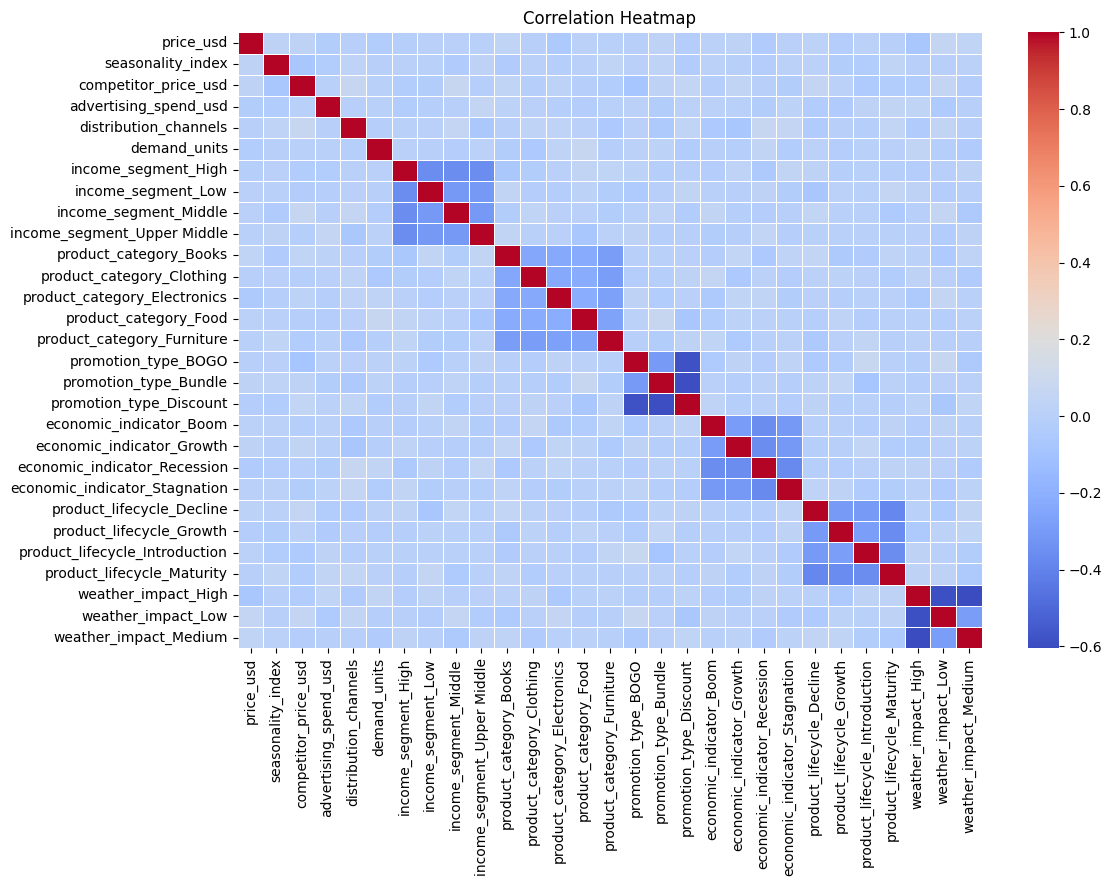

In [220]:
corr_matrix=df4.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [221]:
num_col=df.select_dtypes(include=np.number).columns

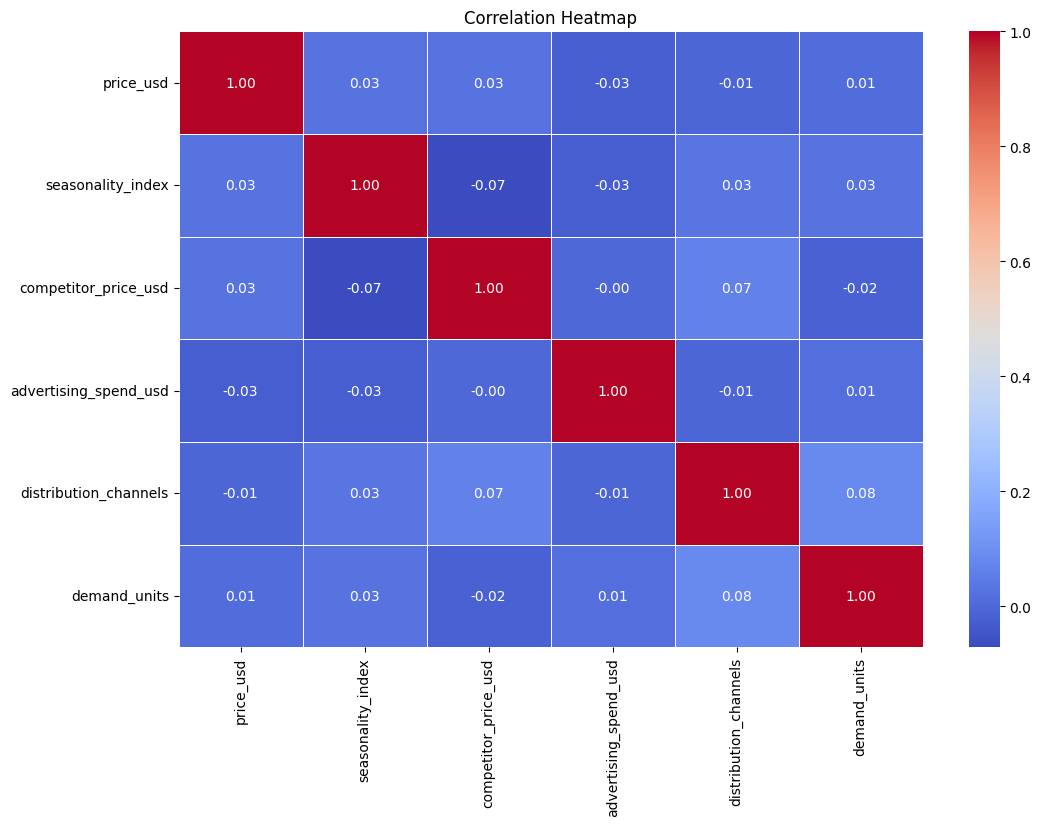

In [222]:
corr_matrix=df[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

#UI INTERFACE FOR THE USER

In [223]:
!pip install gradio

In [224]:
import joblib
joblib.dump(model, "credit_model.pkl")

['credit_model.pkl']

In [225]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   int64  
 6   income_segment_High             1000 non-null   float64
 7   income_segment_Low              1000 non-null   float64
 8   income_segment_Middle           1000 non-null   float64
 9   income_segment_Upper Middle     1000 non-null   float64
 10  product_category_Books          1000 non-null   float64
 11  product_category_Clothing       1000 non-null   float64
 12  product_category_Electronics    100

In [226]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

print(importance.head(10))

seasonality_index                0.167621
advertising_spend_usd            0.141886
competitor_price_usd             0.131148
price_usd                        0.120453
distribution_channels            0.045974
product_category_Clothing        0.023237
economic_indicator_Stagnation    0.022281
weather_impact_High              0.022063
income_segment_High              0.020338
product_category_Books           0.020282
dtype: float64


In [227]:
top_features = importance.head(6).index.tolist()

X_new = df4[top_features]

In [228]:
from sklearn.ensemble import RandomForestRegressor

X_reg = df4[top_features]
y_reg = df4['demand_units']

model_reg = RandomForestRegressor(random_state=42)
model_reg.fit(X_reg, y_reg)

RandomForestRegressor(random_state=42)

In [229]:
def get_category(score):
    if score < 550:
        return "Very Poor"
    elif score < 650:
        return "Poor"
    elif score < 700:
        return "Fair"
    elif score < 750:
        return "Good"
    else:
        return "Excellent"

In [230]:
def predict_credit(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = model_reg.predict(input_array)
    score = round(prediction[0])
    category = get_category(score)

    return score, category

In [231]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_usd                       1000 non-null   float64
 1   seasonality_index               1000 non-null   float64
 2   competitor_price_usd            1000 non-null   float64
 3   advertising_spend_usd           1000 non-null   float64
 4   distribution_channels           1000 non-null   float64
 5   demand_units                    1000 non-null   int64  
 6   income_segment_High             1000 non-null   float64
 7   income_segment_Low              1000 non-null   float64
 8   income_segment_Middle           1000 non-null   float64
 9   income_segment_Upper Middle     1000 non-null   float64
 10  product_category_Books          1000 non-null   float64
 11  product_category_Clothing       1000 non-null   float64
 12  product_category_Electronics    100

In [232]:
import gradio as gr

label_map = {
    "competitor_price_usd": "competitor_price_usd (USD)",
    "price_usd": "price_usd",
    "advertising_spend_usd": "Sadvertising_spend_usd (USD)",
    "distribution_channels": "Distribution_channels",
    "seasonality_index": "Seasonality_index",
    "product_category_Books": "Product_category_Books",
    "product_category_Clothing": "Product_category_Clothing",
}
top_features = list(label_map.keys())

inputs = [
    gr.Number(label=label_map[col])
    for col in top_features
]

In [233]:
custom_css = """
body {
    background-color: #121212 !important;
}

/* Main container */
.gradio-container {
    background-color: #121212 !important;
    color: white !important;
}

/* Title & description */
h1, h2, h3, p {
    color: white !important;
}

/* Input cards white */
.gr-box {
    background-color: white !important;
    color: black !important;
    border-radius: 10px !important;
}

label {
    color: #d32f2f !important;
    font-weight: 700;
}

/* Button styling */
.gr-button {
    background-color: #1f4ed8 !important;
    color: white !important;
    border-radius: 8px !important;
    font-weight: bold;
}

.gr-button:hover {
    background-color: #1e40af !important;
}
"""

In [234]:
interface = gr.Interface(
    fn=predict_credit,
    inputs=inputs,
    outputs=[
        gr.Number(label="demand_units"),
        gr.Textbox(label="seasonality_index")
    ],
    title="Shreeshanth's demand forecasting",
    description="""
Demand forecasting based on price, income level, and seasonality indicators refers to the process of predicting future customer demand by analyzing how purchasing behavior responds to changes in price, consumer income, and seasonal patterns.
""",

    theme=gr.themes.Base(primary_hue="blue"),
    css=custom_css
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://27c2364a12e91c6950.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [235]:
df[df['demand_units'] == df['demand_units'].max()]

,price_usd,income_segment,seasonality_index,product_category,promotion_type,competitor_price_usd,economic_indicator,advertising_spend_usd,distribution_channels,product_lifecycle,weather_impact,demand_units
334,67.472965,Upper Middle,1.49487,Electronics,BOGO,75.643321,Recession,2820.9237,4.0,Growth,High,9971.0
